In [113]:
'''
Question 2.3 Skeleton Code

Here you should implement and evaluate the Naive Bayes classifier.
'''

import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt

def binarize_data(pixel_values):
    '''
    Binarize the data by thresholding around 0.5
    '''
    return np.where(pixel_values > 0.5, 1.0, 0.0)

def compute_parameters(train_data, train_labels):
    '''
    Compute the eta MAP estimate/MLE with augmented data

    You should return a numpy array of shape (10, 64)
    where the ith row corresponds to the ith digit class.
    '''
    eta = []
    # eta has beta(2, 2) prior probability distribution
    a, b = 2, 2
    for k in range(len(set(train_labels))):
        ind = np.squeeze(np.where(train_labels == k))
        eta_k = (np.sum(train_data[ind], axis=0) + a - 1) / (ind.shape[0] + a + b - 2)
        eta.append(eta_k)
    return np.array(eta)

def plot_images(class_images):
    '''
    Plot each of the images corresponding to each class side by side in grayscale
    '''
    img = []
    for i in range(10):
        img_i = class_images[i]
        img.append(img_i.reshape(8, 8))
    img = np.concatenate(img, axis=1)
    plt.imshow(img, cmap='gray')
    plt.show()

def generate_new_data(eta):
    '''
    Sample a new data point from your generative distribution p(x|y,theta) for
    each value of y in the range 0...10

    Plot these values
    '''
    K = eta.shape[0]
    d = eta.shape[1]
    sample = []
    for k in range(K):
        sample_k = []
        for j in range(d):
            p = eta[k][j]
            if np.random.rand() < p:
                sample_k.append(1)
            else:
                sample_k.append(0)
        sample.append(sample_k)
    generated_data = np.array(sample)
    plot_images(generated_data)

def generative_likelihood(bin_digits, eta):
    '''
    Compute the generative log-likelihood:
        log p(x|y, eta)

    Should return an n x 10 numpy array 
    '''
    n = bin_digits.shape[0]
    K = eta.shape[0]
    likelihoods = []
    for i in range(n):
        b = bin_digits[i]
        likelihood = []
        for k in range(K):
            p = np.prod(np.power(eta[k], b) * np.power(1 - eta[k], 1 - b))
            likelihood.append(np.log(p))
        likelihoods.append(likelihood)
    return np.array(likelihoods)

def conditional_likelihood(bin_digits, eta):
    '''
    Compute the conditional likelihood:

        log p(y|x, eta)

    This should be a numpy array of shape (n, 10)
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''
    prior = np.array([0.1 for i in range(eta.shape[0])]).reshape(1, eta.shape[0])
    likelihood = np.exp(generative_likelihood(bin_digits, eta))
    likelihood = likelihood * prior
    return np.log(likelihood / np.sum(likelihood, axis=1, keepdims=True))

def avg_conditional_likelihood(bin_digits, labels, eta):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, eta) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)
    true_likelihood = 0
    N = bin_digits.shape[0]
    for i in range(N):
        k = int(labels[i])
        true_likelihood += cond_likelihood[i][k]
    return true_likelihood / N

def classify_data(bin_digits, eta):
    '''
    Classify new points by taking the most likely posterior class
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)
    return np.argmax(cond_likelihood, axis=1)

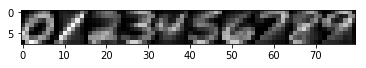

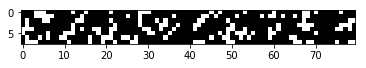

average conditional log-likelihood for
train set: -0.9437538618002514
test set: -0.9872704337253585
accuracy on trainset: 0.7741428571428571
accuracy on testset: 0.76425


In [114]:
def main():
    from sklearn.metrics import accuracy_score
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')
    # 1. Convert the real-valued features x into binary features b using 0.5 as a threshold: 
    # bj = 1 if xj > 0.5 otherwise bj = 0.
    train_data, test_data = binarize_data(train_data), binarize_data(test_data)

    # 2. Using these new binary features b and the class labels, 
    # train a Bernoulli Naive Bayes classifier using MAP estimation with prior Beta(α,β) with α = β = 2. 
    # In particular, fit the model below on the training set.
    eta = compute_parameters(train_data, train_labels)
    # Evaluation
    plot_images(eta)
    generate_new_data(eta)
    avg_train_likelihood = avg_conditional_likelihood(train_data, train_labels, eta)
    avg_test_likelihood = avg_conditional_likelihood(test_data, test_labels, eta)
    print("average conditional log-likelihood for\ntrain set: {}\ntest set: {}".
          format(avg_train_likelihood, avg_test_likelihood))
    # Prediction
    train_pred = classify_data(train_data, eta)
    train_acc = accuracy_score(train_labels, train_pred)
    print("accuracy on trainset: {}".format(train_acc))
    test_pred = classify_data(test_data, eta)
    test_acc = accuracy_score(test_labels, test_pred)
    print("accuracy on testset: {}".format(test_acc))
    
if __name__ == '__main__':
    main()